## Importing the libraries

In [1]:

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score

## DataCleaning

In [2]:
dataset_path = 'dataset.csv'
df = pd.read_csv(dataset_path)
#---------------------------------------
import warnings
warnings.filterwarnings("ignore")
#----------------------------------------
df.dropna()
df.dropna(axis=1)
#df["Glucose"].fillna(df["Glucose"].mean(),inplace=True)
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


## Variables Encoding 

In [3]:
#one hot encode
df = pd.get_dummies(df, drop_first=True)
#--------------------------------------------------
# move y column to last coloumn
column_to_move = df.pop("Outcome")
df.insert(len(df.columns), "Outcome", column_to_move)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Splitting the dataset

In [4]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =0)

## Feature Scaling

In [5]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

## Feature Selection

In [6]:
correalation_matrix=df.corr()
correalation_with_charge=correalation_matrix["Outcome"].sort_values(ascending=False)
correalation_with_charge

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

## Training the SVM Classifier

In [7]:

Classifier = SVC(kernel="linear",random_state=0)  #kernel can be rbf
Classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

## Predicting the Tests

In [8]:
y_predictions = Classifier.predict(X_test)

## Evaluating Model Performance

In [9]:
accuracy=accuracy_score(y_test, y_predictions)
conf_matrix=confusion_matrix(y_test, y_predictions)
print(f"accuracy_score Value: {accuracy}")
print(f"confusion_matrix Value\n: {conf_matrix}")

accuracy_score Value: 0.8181818181818182
confusion_matrix Value
: [[98  9]
 [19 28]]


##  Visualization


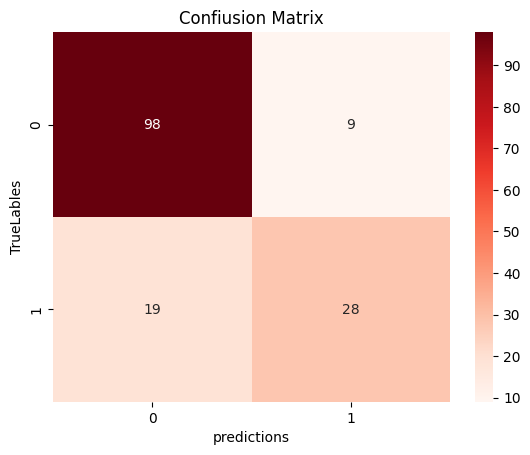

In [10]:
import seaborn as sns
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap="Reds")
plt.title("Confiusion Matrix")
plt.xlabel("predictions")
plt.ylabel("TrueLables")
plt.show()
